In [ ]:
import sys
sys.path.append("../code/chain-diagnostics/")
import os

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

from chain_diagnostics import plot_chain_diagnostics
from getdist import MCSamples, plots

from cosmosis.runtime.config import Inifile
from cosmosis.runtime.pipeline import LikelihoodPipeline, Pipeline

%matplotlib inline

In [2]:
data_dir     = "../data/transition-region-checks/"
plot_dir     = "../plots/transition-region-checks/"

model_variations_fname    = os.path.join(data_dir, "one-two-halos-modelling-variations.csv")
model_variations_data     = pd.read_csv(model_variations_fname, index_col=0)

halotools_cf_fname        = os.path.join(data_dir, "xi_mock_smdpl_z00_sigmaM_43_massMin_1150_alpha115_mass0_1102_mass1_1301_fcentral_50.csv")
halotools_cf_data         = np.loadtxt(halotools_cf_fname, unpack=True)
halotools_r, halotools_xi = halotools_cf_data

halotools_cov_fname       = os.path.join(data_dir, "cov_xi_mock_smdpl_z00_sigmaM_43_massMin_1150_alpha115_mass0_1102_mass1_1301_fcentral_50.csv")
halotools_cov             = np.loadtxt(halotools_cov_fname, delimiter=",")
halotools_xi_err          = np.sqrt(np.diag(halotools_cov))

In [3]:
model_variations_data["label"].unique()

array(['Without cut and without omegam correction',
       'With cut and without omegam correction',
       'Vandenbosch13 + 8 % correction on mass function',
       'Vandenbosch13 - 8 % correction on mass function',
       'Vandenbosch13 - 8 % correction on mass function + centrals only',
       'Vandenbosch13 - 10 % correction on mass function',
       'Vandenbosch13 - 10 % correction on mass function + cut on 0.8 instead of 1.18 on scale dependent halo bias',
       'Vandenbosch13 - 10 % correction on mass function + cut on rvirial',
       'Vandenbosch13 - 10 % correction on mass function + 6 % correction on halo bias (independent of scale)',
       'Vandenbosch13 - 10 % correction on mass function + smaller normalization on ngrestricted',
       'Vandenbosch13 - 10 % correction on mass function + bigger k range on Pkss',
       'With fitted $b_h(r, M)$ and without omegam correction',
       'With fitted $b_h(r, M)$ - 8 % mass function correction',
       'With fitted $b_h(r, M)$ o

In [4]:
r_analytic_fid, xi_analytic_fid = np.array(model_variations_data[model_variations_data["label"] == "Without cut and without omegam correction"][["r", "xi"]]).T

xi_fid_interp      = interp1d(r_analytic_fid, xi_analytic_fid, fill_value="extrapolate")
rel_dev_xi_fid     = lambda r, xi: (xi - xi_fid_interp(r)) / xi_fid_interp(r)
rel_dev_xi_err_fid = lambda r, xi, xi_err: xi_err / xi * rel_dev_xi_fid(r, xi)

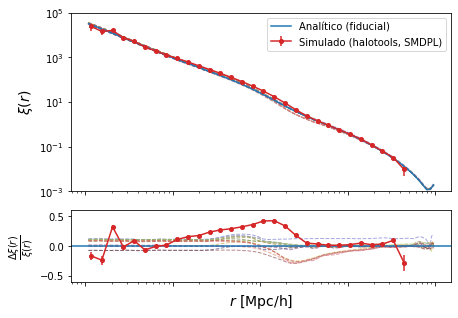

In [5]:
fig = plt.figure(figsize=(6.6, 4.4))

gs = GridSpec(2, 1, height_ratios=[2.5, 1], hspace=0.15, wspace=0.1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)


ax = ax1
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-3, 1e5)

for (label, df), color in zip(model_variations_data.groupby("label"), plt.get_cmap("tab20b").colors):
    r  = df["r"]
    xi = df["xi"]
    #ax.plot(r, xi, ls="dashed", alpha=0.6, color=color, label=label)
    ax.plot(r, xi, ls="dashed", alpha=0.6, lw=1, color=color)
    
l = ax.errorbar(halotools_r, halotools_xi, halotools_xi_err,
                color="tab:red", ls="-", marker='o', ms=4., lw=1.5, label=r"Simulado (halotools, SMDPL)")
l = l[0]
ax.plot(r_analytic_fid, xi_analytic_fid,
        color="tab:blue", ls="-", lw=1.5, label=r"Analítico (fiducial)")

ax.legend(fontsize=10)
ax.set_ylabel(r"$\xi(r)$", fontsize=14);


ax  = ax2

ax.set_xscale("log")
ax.set_ylim(-0.6, 0.6)

for (label, df), color in zip(model_variations_data.groupby("label"), plt.get_cmap("tab20b").colors):
    r  = df["r"]
    xi = df["xi"]
    ax.plot(r, rel_dev_xi_fid(r, xi), ls="dashed", alpha=0.6, lw=1, color=color)
    
l = ax.axhline(0., ls="-", color="tab:blue", lw=1.5)
l = ax.errorbar(halotools_r, rel_dev_xi_fid(halotools_r, halotools_xi),
                rel_dev_xi_err_fid(halotools_r, halotools_xi, halotools_xi_err),
                ls="-", lw=1.5, ms=4, marker='o', color="tab:red")

ax.set_xlabel(r"$r$ [Mpc/h]", fontsize=14)
ax.set_ylabel(r"$\frac{\Delta \xi(r)}{\xi(r)}$", fontsize=14);

ax1.set_xticklabels([])

plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1)


fig.savefig(os.path.join(plot_dir, "xi_comparison_simulated_analitic_models.pdf"), dpi=600)
fig.savefig(os.path.join(plot_dir, "xi_comparison_simulated_analitic_models.png"), dpi=100)

### Git tags (notebook)

In [6]:
%%bash

for dir in $(find ../code/ -mindepth 1 -maxdepth 1 -type d -printf "%P\n") ;
do
    pushd ../code/$dir > /dev/null
    echo "$dir: $(git rev-parse HEAD)"
    popd > /dev/null
done

pushd $COSMOSIS_SRC_DIR > /dev/null
echo "cosmosis: $(git rev-parse HEAD)"
pushd $COSMOSIS_SRC_DIR/cosmosis-standard-library > /dev/null
echo "cosmosis-standard-library: $(git rev-parse HEAD)"

__pycache__: f6cc57c28701245b50608d5dfaeb4c72ac53224a
hod: 5aae026793e6346e22dfde8a4c9889f805c07130
chain-diagnostics: 212f01c17b4226da0c35fe7e5314e17699f8cc94
jackknife-tools: 739c049f37c02820baa255ca11228538c2661291
halotools-utils: 6b22d1d9ea0a87413e46ecff90cea7065e3c6782
hod-scripting-utils: 9cb4ad2c97dc8a881bd9bf84d9392719d3bcaf45
cosmosis: 1d00a39d48c8ec61af755a989cb480de58b89213
cosmosis-standard-library: bd73c4981b19a30239436d54a33f89d53b70f7f2


bash: /home/pedro/miniconda3/envs/monografia/lib/libtinfo.so.6: no version information available (required by bash)
